In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell

In [2]:
xwd = 0
ywd = 0
zwd = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10}

In [3]:
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [4]:
from old_helper import OldHelper

In [5]:
helper = OldHelper()

In [6]:
s = 10
green_matrix = helper.get_green_matrix(well, s)
green_matrix

array([[ 0.        ,  0.16388044,  0.14348183,  0.06771036,  0.04094708,
         0.02621091,  0.0172706 ,  0.01158583,  0.00786877,  0.00539287,
         0.00372179],
       [ 0.        ,  0.07846344,  0.13272874,  0.12636408,  0.05736261,
         0.03438834,  0.02193357,  0.01442751,  0.00967021,  0.00656488,
         0.00449833],
       [ 0.        ,  0.04731174,  0.0613457 ,  0.122381  ,  0.11980535,
         0.05308527,  0.03154525,  0.02001796,  0.01312362,  0.00877567,
         0.00594731],
       [ 0.        ,  0.030194  ,  0.036964  ,  0.05478696,  0.11810366,
         0.11696226,  0.05116966,  0.03024136,  0.01912342,  0.01250604,
         0.00834712],
       [ 0.        ,  0.01984625,  0.02363526,  0.03268666,  0.05194387,
         0.11618805,  0.11565837,  0.05027512,  0.02962379,  0.01869486,
         0.01220739],
       [ 0.        ,  0.01328752,  0.01556891,  0.02079217,  0.03077104,
         0.05063998,  0.11529351,  0.11504079,  0.04984656,  0.02932513,
         0.018

In [7]:
source_matrix = helper.get_source_matrix(well, s)
source_matrix

array([[ 0.        ,  0.00314159,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.00628319,  0.00314159,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.00942478,  0.00628319,  0.00314159,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.01256637,  0.00942478,  0.00628319,  0.00314159,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.01570796,  0.01256637,  0.00942478,  0.00628319,
         0.00314159,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.01884956,  0.01570796,  0.01256637,  0.00942478,
         0.00628319,  0.00314159,  0.        ,  0.        ,  0.        ,
         0.   

In [8]:
right_part = helper.get_right_part(well,s)
right_part

array([ 0.00314159,  0.00628319,  0.00942478,  0.01256637,  0.01570796,
        0.01884956,  0.02199115,  0.02513274,  0.02827433,  0.03141593,  1.        ])

In [9]:
well.recalc(10)

In [10]:
well.p_lapl

0.053903135443056832

In [11]:
ss = np.logspace(-3, 3, 55)

In [12]:
pp = []
for s in ss:
    well.recalc(s)
    pp.append(well.p_lapl)

In [13]:
pp

[4392.3494222486452,
 3301.992971779061,
 2480.1206713256124,
 1861.0788794934388,
 1395.1736621818054,
 1044.8109268788826,
 781.56592383929456,
 583.95921719184059,
 435.76950326406245,
 324.75423392333033,
 241.67990570143073,
 179.58740218139977,
 133.23568303936929,
 98.680737038070475,
 72.957078941853496,
 53.836949888747846,
 39.648370216880252,
 29.137744910472868,
 21.366178848710252,
 15.631283972875167,
 11.408252838018637,
 8.3054846210771274,
 6.03119604072364,
 4.368318672983337,
 3.1556426320374849,
 2.2736653107863045,
 1.6339814257406093,
 1.1713362895292918,
 0.83768028544637452,
 0.5977258170936709,
 0.42563134774280348,
 0.30253022712982652,
 0.21469217925345543,
 0.1521581680769562,
 0.10772910014939005,
 0.07621867869673106,
 0.053903135443056832,
 0.038117387982388583,
 0.026959803633640787,
 0.019077249419389427,
 0.013509259592411258,
 0.0095755420783395669,
 0.0067951070519543678,
 0.0048283570621970107,
 0.0034357702791570745,
 0.0024485195617094456,
 0.0017

### Here I checked that p_lapl works OK in comparison to Excel model shows

In [14]:
n = 8
v = calc_stehf_coef(n)
v

array([  0.00000000e+00,  -3.33333333e-01,   4.83333333e+01,
        -9.06000000e+02,   5.46466667e+03,  -1.43766667e+04,
         1.87300000e+04,  -1.19466667e+04,   2.98666667e+03])

### Here I checked Stehfest works

In [15]:
'''
class Well():
    # class for describing a well
    # in real space
    def __init__(self, xw, yw,
        outer_bound,
        top_bound,
        bottom_bound,
        wtype,
        params,
        n_stehf, 
        zw = 0):
        self.params = params
        self.xwd = xw/self.params["ref_length"]
        self.ywd = yw/self.params["ref_length"]
        self.zwd = zw/self.params["z_ref_length"]
        self.outer_bound = outer_bound
        self.top_bound = top_bound
        self.bottom_bound = bottom_bound
        self.wtype = wtype
        self.n_stehf = n_stehf
        self.v = calc_stehf_coef(self.n_stehf)
        self.lapl_well = LaplWell(
            self.xwd,
            self.ywd,
            self.zwd,
            self.outer_bound,
            self.top_bound,
            self.bottom_bound,
            self.wtype,
            self.params)
'''
from well import Well

In [26]:
params = {"nseg": 20, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":1, "ref_length": 1, "z_ref_length": 1}
real_well = Well(0, 0, "infinite", "imp", "imp",
                "frac", params, 8)

In [31]:
import pandas as pd

In [36]:
df = pd.read_csv('./calibration_points.csv', sep=";", decimal=',')

In [37]:
df

,Td_xf,"0,628318531","3,141592654","6,283185307","31,41592654","62,83185307","314,1592654"
0,0.001,0.5449,0.2443,0.1732,0.0666,0.0718,0.0590
1,0.002,0.6380,0.2881,0.2056,0.1100,0.0946,0.0614
2,0.003,0.7024,0.3190,0.2289,0.1277,0.1120,0.0986
3,0.004,0.7520,0.3432,0.2475,0.1424,0.1265,0.1130
4,0.005,0.7926,0.3633,0.2632,0.1553,0.1392,0.1256
5,0.006,0.8273,0.3806,0.2770,0.1668,0.1506,0.1369
6,0.007,0.8576,0.3959,0.2893,0.1773,0.1610,0.1472
7,0.008,0.8846,0.4098,0.3006,0.1871,0.1706,0.1568
8,0.009,0.9090,0.4224,0.3110,0.1962,0.1796,0.1658
9,0.010,0.9313,0.4341,0.3207,0.2047,0.1881,0.1742


In [64]:
from well import Well
xw = 0
yw = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
params = {"nseg": 20, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":0.2*np.pi, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xw, yw, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)

In [65]:
ts = np.array(df["Td_xf"])
y_true = df["0,628318531"]
y_pred = []
for t in ts:
    y_pred.append(real_well.get_pw(t))

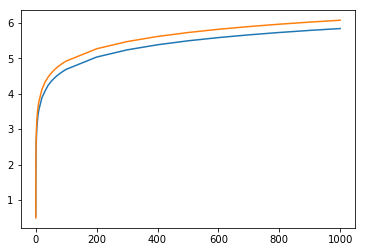

In [66]:
plt.plot(ts,y_true)
plt.plot(ts, y_pred)

### Here I checked that algo works correctly

In [1]:
? AttributeError